# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [1]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# will involve iqr and quartiles so check statistincs in day 3 
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
summary_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# remove duplicates
duplicate_mice_df = summary_df[summary_df.duplicated()]
# call the specified column Mouse ID and convert into an array so it becomes callable in loc later
duplicate_mice = duplicate_mice_df["Mouse ID"].array
duplicate_mice[0]
summary_df = summary_df[summary_df["Mouse ID"] != duplicate_mice[0]]


drug_df = summary_df.groupby(["Drug Regimen"])
tumor_mean = drug_df["Tumor Volume (mm3)"].mean()
tumor_median = drug_df["Tumor Volume (mm3)"].median()
tumor_var = drug_df["Tumor Volume (mm3)"].var()
tumor_std = drug_df["Tumor Volume (mm3)"].std()
tumor_sem = drug_df["Tumor Volume (mm3)"].sem()

tumor_dict = {"Mean Tumor Volume": tumor_mean,
             "Median Tumor Volume": tumor_median,
             "Tumor Volume Variance": tumor_var,
             "Tumor Volume Std. Dev.": tumor_std,
             "Tumor Volume Std. Err.": tumor_sem}
tumor_df = pd.DataFrame(tumor_dict)
summary_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Bar and Pie Charts

<IPython.core.display.Javascript object>


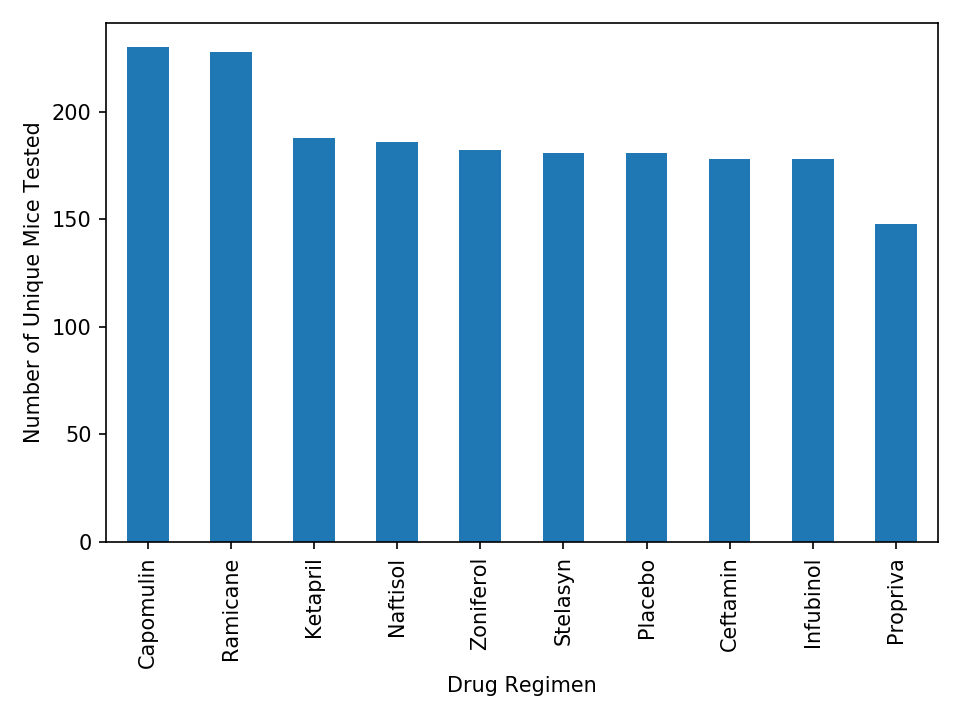

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# place here to start a new figure and prevent overlaps
fig, (ax1) = plt.subplots(1,1)

# make a new df with just the desired values for clarity
bar_df = summary_df[["Drug Regimen", "Mouse ID"]]

# calculate based on the counts of each drug
bar_plot = bar_df["Drug Regimen"].value_counts()

#plot
bar_plot.plot(kind="bar")

# labels and formatting
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.tight_layout()


<IPython.core.display.Javascript object>


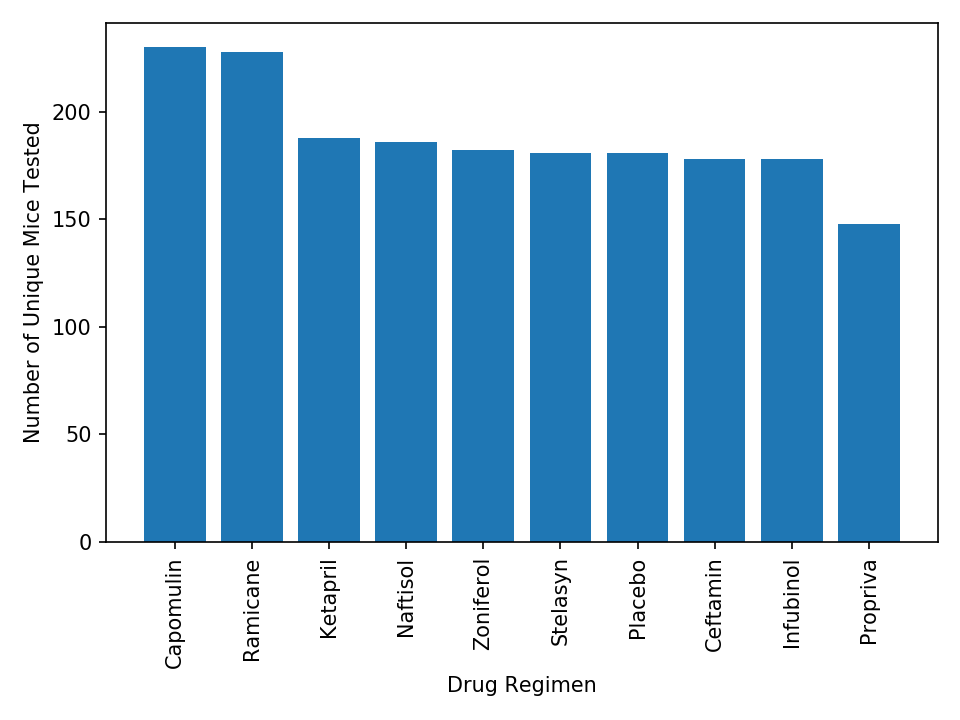

In [13]:
# place here to start a new figure and prevent overlaps
fig, (ax1) = plt.subplots(1,1)

# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
y_axis = summary_df["Drug Regimen"].value_counts()
labels = y_axis.index.values
x_axis = np.arange(len(labels))

# set up graph; colors and alpha are default
plt.bar(x_axis, y_axis, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)
# will prevent overlap of the labels 
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.tight_layout()

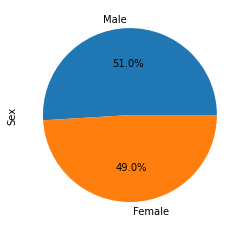

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


<IPython.core.display.Javascript object>


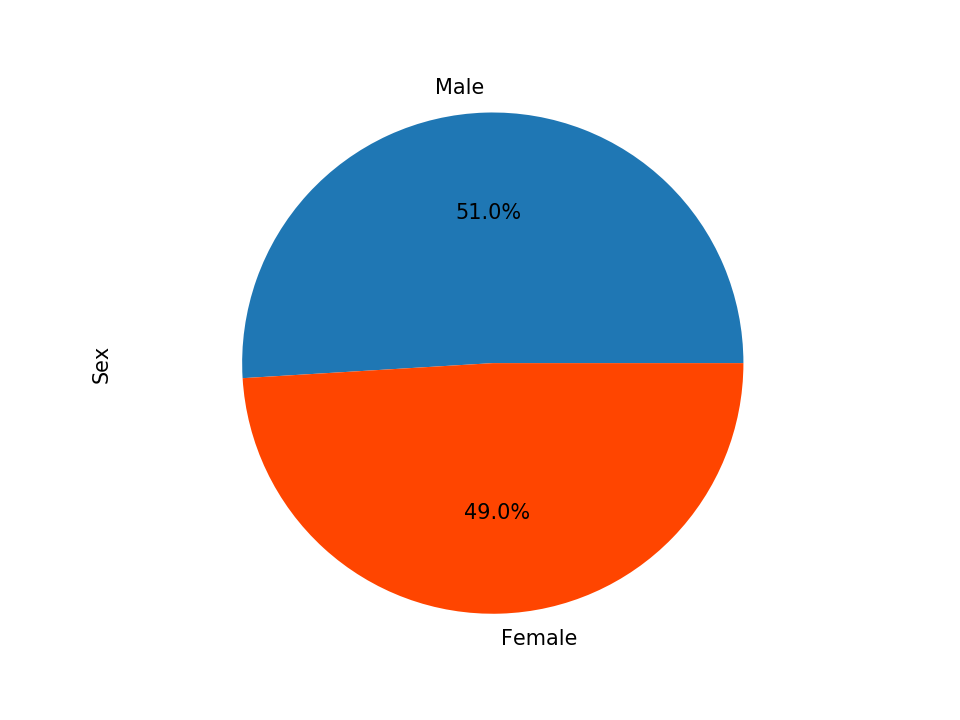

In [14]:
# place here to start a new figure and prevent overlaps
fig, (ax1) = plt.subplots(1,1)

pie_plot = summary_df["Sex"].value_counts()
pie_plot = pie_plot.plot(kind="pie",autopct="%1.1f%%",colors=["tab:blue", "orangered"], ax = ax1)
plt.axis("equal")
pie_plot.set_ylabel("Sex")
pie_plot
#pie_plot.set_ylabel("Sex")
#line_plot = one_mouse.plot(kind = "line", x = "Timepoint", y = "Tumor Volume (mm3)", title = "Capomulin treatment of " + mouse, legend = False)

<IPython.core.display.Javascript object>


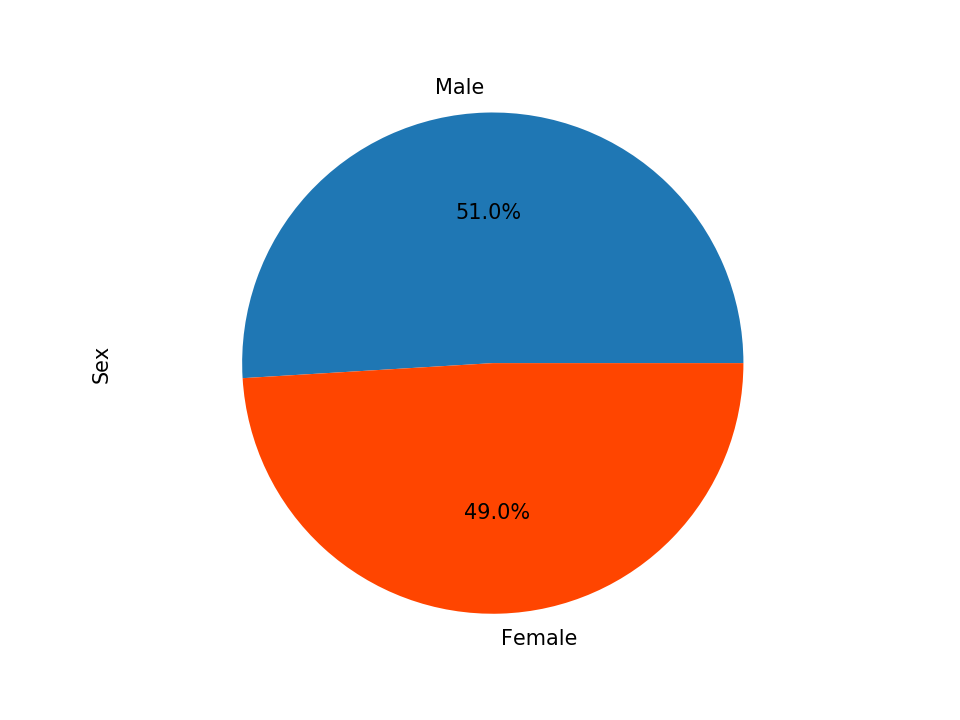

Text(0, 0.5, 'Sex')

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# place here to start a new figure and prevent overlaps
fig, (ax1) = plt.subplots(1,1)

# get the sizes from the dataframe and use value counts to make it numeric
sizes = summary_df["Sex"].value_counts()

# the index of sizes will still be the sexes so it can be used here for labels
labels = sizes.index.values

# colors was defined in method in the previous one so we need a variable here
colors = ["tab:blue", "orangered"]

# plot 
ax1.pie(sizes, labels=labels, colors=colors,autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel("Sex")

# colors may look slightly different due to using different methods 

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

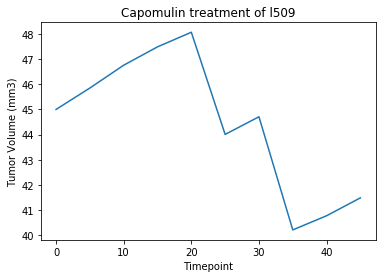

In [68]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = summary_df.loc[summary_df["Drug Regimen"] == "Capomulin"]
mouse = "l509"
one_mouse = line_df.loc[line_df["Mouse ID"] == mouse]

line_plot = one_mouse.plot(kind = "line", x = "Timepoint", y = "Tumor Volume (mm3)", title = "Capomulin treatment of " + mouse, legend = False)
line_plot.set_ylabel("Tumor Volume (mm3)")
